<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 1</h2><br/>
<h1>Inferencia Estadística</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>

</div>

# Tipos de errores

Para determinar el correcto funcionamiento de un algoritmo de clasificación, podemos preguntarnos

- *¿Cuántas veces acertamos la clasificación de una clase y cuántas veces no?*

Los errores que puede cometer nuestro clasificador son de dos tipos:

## Errores de Tipo 1: Falso Positivo

Clasificamos un elemento como *perteneciente* (positivo) a la clase **incorrectamente** (falso)

<img src="images/un5.jpeg" alt="" width="300px" align="center"/>

## Errores de Tipo 2: Falso Negativo

Clasificamos un elemento como *no perteneciente* (negativo) a la clase **incorrectamente** (falso)

<img src="images/noUn5.jpeg" alt="" width="300px" align="center"/>

# Matriz de confusión

Permite contar la cantidad de veces que instancias de la clase A son clasificadas como clase B

<img src="images/matrizConfusion.png" alt="" width="700px" align="center"/>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow", O'Reilly

## Ejemplo

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Primera vez que se importa la biblioteca de aprendizaje automático scikit-learn
# No te preocupes si esto parece mucho código
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ten en cuenta que es probable que el nombre del archivo sea diferente en tu computadora (especialmente más adelante en el curso)
filename = 'data/titanic.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Transforma la columna Sexo en una forma que no sea de texto
# Elijo cuatro funciones, podrías haber elegido otras
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']
# Convierta la columna Sexo en algo que pueda alimentar a un modelo
# Tiene
df['Sex'] = df.Sex.map({'male': 0, 
                        'female': 1})
# Eliminar filas donde la edad es nan del conjunto de datos
df = df.loc[~df['Age'].isnull(), :]
# Crear matriz de características y vector objetivo
X = df.loc[:, feature_cols]
y = df['Survived']
# Divida los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)
# Estandarizar datos
scaler = StandardScaler()
# Ajusta solo en el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transformación tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Crea una instancia de un modelo
logreg = LogisticRegression()
# Entrena el modelo con los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)
print(predictions)
print(y_test.tolist())

[1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [4]:
# valores reales: y_test.values
# predicciones: predicciones del modelo
print("Total de elementos:", len(y_test.values))
cm = metrics.confusion_matrix(y_test.values, predictions)
print(metrics.confusion_matrix(y_test.values, predictions).ravel())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.values, predictions).ravel()
print(cm)
print(tn, fp, fn, tp)

Total de elementos: 179
[87 16 17 59]
[[87 16]
 [17 59]]
87 16 17 59


# Accuracy (exactitud)

- Fracción de casos correctamente clasificados sobre casos totales (¿Cuántas veces acerté?)

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- En nuestra matriz de confusión anterior, sería

$$\text{accuracy} = \frac{87 + 59}{87 + 16 + 17 + 59} = 0.8156 = 81.56\%$$

In [5]:
score = logreg.score(X_test, y_test) # Esta línea, para este modelo, calcula el accuracy
print("Score obtenido por Regresor", score)
manual_score = (tp + tn)/(tp + tn + fp + fn)
print("Score obtenido manualmente", manual_score)

Score obtenido por Regresor 0.8156424581005587
Score obtenido manualmente 0.8156424581005587


In [6]:
# Ej. Modelo de clasificación de 5s
import numpy as np
datos = [1,2,1,3,4,2,5,3,4,6,5,4,2,7,9,8,9,6,4,5]
predicciones = np.zeros(20) # Crea una lista de 0s
valores_reales = [0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1]
print(predicciones)
print(valores_reales)
# Nuestro modelo clasifica todo como NO 5
tn=17 # 17 son los números que no eran 5, por lo tanto nuestro modelo los clasifico bien
tp=0 # Como no clasificamos ningún 5, los TP son
fn=3 # Los 5s que clasificamos incorrectamente, están acá
fp=0 # No hicimos ninguna claisificación FP.

accuracy = (tn+tp)/(tn+tp+fn+fp)
print(accuracy*100)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
85.0


El accuracy es una excelente medida, pero que se basa en un supuesto:Los datos positivos y negativos deben ser **COMPARABLES**, lo cual no siempre ocurre.

# Sensitivity/Recall/True Positive Rate (sensibilidad)

- Fracción de casos **pertenecientes** a una clase correctamente clasificados (¿Cuántas veces acerté al clasificar la clase X?)

$$ \text{sensitivity} = \frac{TP}{TP + FN} = \frac{\text{Positivos correctamente clasificados}}{\text{Positivos reales totales}} $$

In [7]:
# Ahora, calculemos la sensibilidad de nuestro modelo de
# No 5s
sensitivity = tp/(tp+fn)
print(sensitivity*100)

0.0


# Specifity/Selectivity/True Negative Rate (especificidad)

- Fracción de casos **no pertenecientes** a una clase correctamente clasificados (¿Cuántas veces acerté al clasificar casos fuera de la clase X?)

$$ \text{specificity} = \frac{TN}{TN + FP} $$

In [8]:
# Calculemos ahora la especificidad de nuestro model
# No 5s
specificity = (tn)/(tn + fp)
print(specificity*100)

100.0


# Precision/Positive predictions (precisión)

- Fracción de casos clasificados como **positivos** que fueron correctamente clasificados (¿Cuántos casos clasificados como X fueron acertados?)

$$ \text{precision} = \frac{TP}{TP + FP} $$

In [9]:
# Calculemos la precision de nuestro modelo
# No 5s
precision = tp/(tp+fp)
print(precision*100)

ZeroDivisionError: division by zero

In [12]:
# Calcular sensibilidad, especificidad y precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
#precision = tp / (tp + fp)
print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))
#print('Precision: {:.3f}'.format(precision))

Sensitivity: 0.000
Specificity: 1.000


# Histogramas

- Gráfico que permite mostrar visualmente cuántos elementos pertenecen a una cierta categoría.
- Las categorías pueden ser **clases** o **rangos numéricos**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
filename = 'data/kingCountyHouseData.csv'
df = pd.read_csv(filename)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


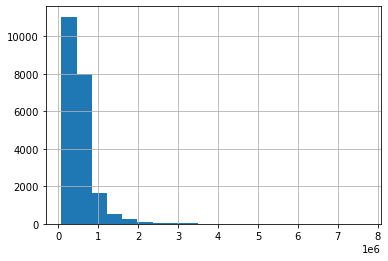

In [15]:
df['price'].hist(bins=20)
plt.show()

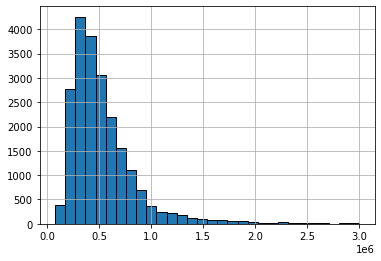

In [19]:
price_filter = df.loc[:, 'price'] <= 3000000
df.loc[price_filter, 'price'].hist(bins = 30,
                                   edgecolor='black')
plt.show()

# Box Plot (diagramas de caja)

- Gráfico que permite resumir la distribución de los valores de una muestra
<img src="images/boxplot.png" alt="" width="700px" align="center"/>

Fuente: [Towards Data Science: Understanding boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = 'data/wisconsinBreastCancer.csv'
df = pd.read_csv(filename)
df.head()

In [ ]:
malignant = df.loc[df['diagnosis']=='M','area_mean'].values
benign = df.loc[df['diagnosis']=='B','area_mean'].values
plt.boxplot([malignant,benign], labels=['M', 'B']);

Material adicional: Excelente explicación de los distintos elementos de un boxplot [aquí](https://www.youtube.com/watch?v=O4wx-J5g4Nc)

# Muestreo

Selección de un subconjunto de instancias (muestra) a partir de un conjunto de datos

## Muestreo con reemplazo

<img src="images/sampleWithReplacement.png" alt="" width="250px" align="center"/>

## Muestreo sin reemplazo

<img src="images/sampleWithoutReplacement.png" alt="" width="250px" align="center"/>

In [ ]:
# NumPy es bueno para ayudar a generar números aleatorios
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

In [ ]:
# Muestreo con reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=True)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

In [ ]:
# Muestreo sin reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=False)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

# Actividad 3

- En el archivo [notas-genero.csv](notas-genero.csv), se encuentran almacenados los nombres, nota final y genero de los estudiantes que han cursado una asignatura. Realice lo siguiente (preocúpese de la estética):

    1. Cargue la información de dicho archivo en un dataframe pandas.
    2. Con la información extraída, genere un **histograma** de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar.
    3. Ordene las notas y genere **un gráfico** (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
    4. Genere **dos gráficos de torta** en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.